In [135]:
import pandas as pd
from matplotlib import pyplot as plt

In [136]:
url = "https://public.tableau.com/app/sample-data/HollywoodsMostProfitableStories.csv"
df = pd.read_csv(url)

In [137]:
df.head()

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,27 Dresses,Comedy,Fox,71.0,5.343622,40.0,160.308654,2008
1,(500) Days of Summer,Comedy,Fox,81.0,8.096000,87.0,60.720000,2009
2,A Dangerous Method,Drama,Independent,89.0,0.448645,79.0,8.972895,2011
3,A Serious Man,Drama,Universal,64.0,4.382857,89.0,30.680000,2009
4,Across the Universe,Romance,Independent,84.0,0.652603,54.0,29.367143,2007


In [138]:
df.isnull().sum()

Film                 0
Genre                0
Lead Studio          1
Audience  score %    1
Profitability        3
Rotten Tomatoes %    1
Worldwide Gross      0
Year                 0
dtype: int64

In [139]:
df.sort_values(by= ["Audience  score %"])
#je veux trier les films selon le pourcentage donné par l'audience

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
71,You Will Meet a Tall Dark Stranger,Comedy,Independent,35.0,1.211818,43.0,26.660000,2010
27,Love Happens,Drama,Universal,40.0,2.004444,18.0,36.080000,2009
55,The Heartbreak Kid,Comedy,Paramount,41.0,2.129444,30.0,127.766650,2007
70,When in Rome,Comedy,Disney,44.0,NaN,15.0,43.040000,2010
20,Killers,Action,Lionsgate,45.0,1.245333,11.0,93.400000,2010
...,...,...,...,...,...,...,...,...
35,My Week with Marilyn,Drama,The Weinstein Company,84.0,0.825800,83.0,8.258000,2011
51,Tangled,Animation,Disney,88.0,1.365692,89.0,355.080000,2010
67,WALL-E,Animation,Disney,89.0,2.896019,96.0,521.283432,2008
2,A Dangerous Method,Drama,Independent,89.0,0.448645,79.0,8.972895,2011


In [140]:
df.rename(columns={ "Lead Studio": "Lead_studio"}, inplace=True)

In [141]:
df.head()
#Je vérifie que la colonne a bien été renommée.

,Film,Genre,Lead_studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,27 Dresses,Comedy,Fox,71.0,5.343622,40.0,160.308654,2008
1,(500) Days of Summer,Comedy,Fox,81.0,8.096000,87.0,60.720000,2009
2,A Dangerous Method,Drama,Independent,89.0,0.448645,79.0,8.972895,2011
3,A Serious Man,Drama,Universal,64.0,4.382857,89.0,30.680000,2009
4,Across the Universe,Romance,Independent,84.0,0.652603,54.0,29.367143,2007


In [142]:
df.Profitability.fillna(0)

0     5.343622
1     8.096000
2     0.448645
3     4.382857
4     0.652603
        ...   
69    6.267647
70    0.000000
71    1.211818
72    1.090000
73    1.747542
Name: Profitability, Length: 74, dtype: float64

In [143]:
mean_AS = df["Audience  score %"].mean()

In [144]:
print(mean_AS)
#Je veux voir la valeur moyenne en pourcentage sur le score de l'audience.

64.13698630136986


In [145]:
max_AS = df["Audience  score %"].max()

In [146]:
print(max_AS)
#De même pour la valeur maximale, ce qui permet de voir que jamais il n'y a eu de 100% par exemple.

89.0


In [147]:
df.dtypes

Film                  object
Genre                 object
Lead_studio           object
Audience  score %    float64
Profitability        float64
Rotten Tomatoes %    float64
Worldwide Gross      float64
Year                   int64
dtype: object

In [148]:
df.Year.unique()
#Cela permet de voir les différentes années sur lesquelles les films ont été évalués.

array([2008, 2009, 2011, 2007, 2010], dtype=int64)

In [149]:
df.Lead_studio.unique()
#Je récupère la liste des différents studios 

array(['Fox', 'Independent', 'Universal', 'Sony', 'Disney',
       'Warner Bros.', 'Lionsgate', 'Summit', '20th Century Fox',
       'The Weinstein Company', nan, 'New Line', 'Paramount', 'CBS'],
      dtype=object)

In [150]:
LS = ['Fox', 'Independent', 'Universal', 'Sony', 'Disney',
       'Warner Bros.', 'Lionsgate', 'Summit', '20th Century Fox',
       'The Weinstein Company', 'New Line', 'Paramount', 'CBS']

In [151]:
    for studio in LS:
        count=0
        for i in range(74):
            if df.iloc[i-1,2] == studio :
                count += 1
        print(f"{count} ont lieu au studio {studio}")

#Je cherche le nombre de films réalisés dans chaque studio

6 ont lieu au studio Fox
19 ont lieu au studio Independent
7 ont lieu au studio Universal
4 ont lieu au studio Sony
7 ont lieu au studio Disney
12 ont lieu au studio Warner Bros.
2 ont lieu au studio Lionsgate
5 ont lieu au studio Summit
2 ont lieu au studio 20th Century Fox
3 ont lieu au studio The Weinstein Company
1 ont lieu au studio New Line
4 ont lieu au studio Paramount
1 ont lieu au studio CBS


In [152]:
#Je peux également compter les studios d'une autre manière en utilisant group by

In [153]:
by_studio= df.groupby(by="Lead_studio")

In [154]:
by_studio.size()

Lead_studio
20th Century Fox          2
CBS                       1
Disney                    7
Fox                       6
Independent              19
Lionsgate                 2
New Line                  1
Paramount                 4
Sony                      4
Summit                    5
The Weinstein Company     3
Universal                 7
Warner Bros.             12
dtype: int64

In [155]:
#On retrouve bien les mêmes résultats avec les deux méthodes, bien que la deuxième soit plus rapide/facile.

In [156]:
df.tail()

,Film,Genre,Lead_studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
69,What Happens in Vegas,Comedy,Fox,72.0,6.267647,28.0,219.367646,2008
70,When in Rome,Comedy,Disney,44.0,NaN,15.0,43.040000,2010
71,You Will Meet a Tall Dark Stranger,Comedy,Independent,35.0,1.211818,43.0,26.660000,2010
72,Youth in Revolt,Comedy,The Weinstein Company,52.0,1.090000,68.0,19.620000,2010
73,Zack and Miri Make a Porno,Romance,The Weinstein Company,70.0,1.747542,64.0,41.941000,2008


<Axes: xlabel='Rotten Tomatoes %', ylabel='Aud score %'>

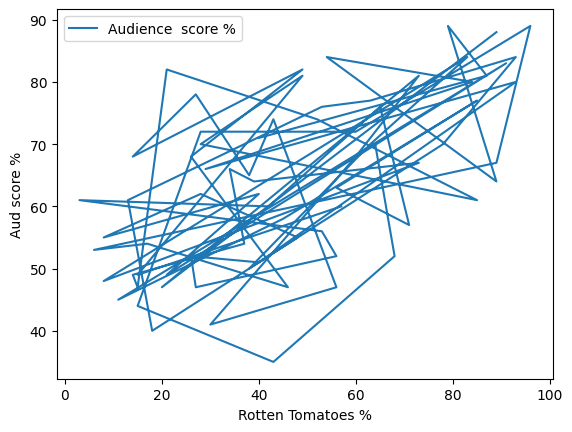

In [157]:
df.plot(x="Rotten Tomatoes %", y="Audience  score %", ylabel = "Aud score %", xlabel = "Rotten Tomatoes %")
#je veux chercher à voir s'il y a un lien entre les deux éléments, on remarque ici que ce n'est pas le cas

In [183]:
df.rename(columns={ 'Audience  score %': "Audience_score_per"}, inplace=True)

<Axes: >

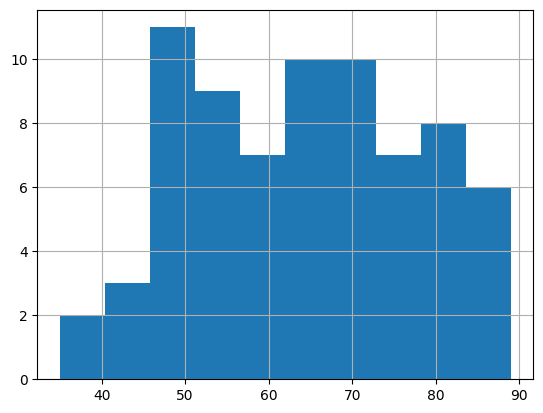

In [185]:
df.Audience_score_per.hist()
#Cela permet de voir la répartition des pourcentages dans les films.

In [174]:
df.rename(columns={ "Rotten Tomatoes %": "Rotten_tomatoes_per"}, inplace=True)
#Je renomme ces colonnes pour éviter qu'il y ait un espace et donc que certaines commandes ne fonctionnent pas

In [161]:
df.head()

,Film,Genre,Lead_studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,27 Dresses,Comedy,Fox,71.0,5.343622,40.0,160.308654,2008
1,(500) Days of Summer,Comedy,Fox,81.0,8.096000,87.0,60.720000,2009
2,A Dangerous Method,Drama,Independent,89.0,0.448645,79.0,8.972895,2011
3,A Serious Man,Drama,Universal,64.0,4.382857,89.0,30.680000,2009
4,Across the Universe,Romance,Independent,84.0,0.652603,54.0,29.367143,2007


In [162]:
df.loc[3,'Worldwide Gross']

30.68

In [163]:
group = df.groupby("Year")

In [164]:
group.get_group(2007)
#Cela me permet d'accéder à tous les films de 2007 dans ces données
#Je pourrai également refaire la même chose mais en classant par genre, ce qui permettrait d'accéder directement 
#à toutes les comédies par exemple, et donc de faciliter certaines recherches

,Film,Genre,Lead_studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
4,Across the Universe,Romance,Independent,84.0,0.652603,54.0,29.367143,2007
7,Enchanted,Comedy,Disney,80.0,4.005737,93.0,340.487652,2007
13,Good Luck Chuck,Comedy,Lionsgate,61.0,2.367685,3.0,59.192128,2007
21,Knocked Up,Comedy,Universal,83.0,6.636402,91.0,219.001261,2007
24,License to Wed,Comedy,Warner Bros.,55.0,1.980206,8.0,69.307224,2007
34,Music and Lyrics,Romance,Warner Bros.,70.0,3.647411,63.0,145.896422,2007
38,No Reservations,Comedy,NaN,64.0,3.307180,39.0,92.601050,2007
43,P.S. I Love You,Romance,Independent,82.0,5.103117,21.0,153.093505,2007
55,The Heartbreak Kid,Comedy,Paramount,41.0,2.129444,30.0,127.766650,2007
63,Tyler Perry's Why Did I get Married,Romance,Independent,47.0,3.724192,46.0,55.862886,2007


In [165]:
#Je veux maintenant trouver les comédies de 2007 directement

In [166]:
df_comedy = df.query("Genre == 'Comedy' ")

In [167]:
df_2007 = df.query("Year == 2007 ")

In [168]:
pd.merge(df_comedy, df_2007)
#De la même manière, je peux appronfondir les contraintes pour m'adapter aux demandes d'un spectateur par exemple

,Film,Genre,Lead_studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,Enchanted,Comedy,Disney,80.0,4.005737,93.0,340.487652,2007
1,Good Luck Chuck,Comedy,Lionsgate,61.0,2.367685,3.0,59.192128,2007
2,Knocked Up,Comedy,Universal,83.0,6.636402,91.0,219.001261,2007
3,License to Wed,Comedy,Warner Bros.,55.0,1.980206,8.0,69.307224,2007
4,No Reservations,Comedy,NaN,64.0,3.307180,39.0,92.601050,2007
5,The Heartbreak Kid,Comedy,Paramount,41.0,2.129444,30.0,127.766650,2007
